# Setup

In [34]:
import numpy as np

# Tensorflow + confirm GPU is visible
import tensorflow as tf
#from tensorflow.python.client import device_lib
#assert 'GPU' in str(device_lib.list_local_devices())

# Keras
import keras
from keras.models import Sequential # For Feed Forward NN
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten # Basic layers
from keras.layers import Conv2D, MaxPooling2D # CNN layers
from keras.utils import np_utils

# confirm Keras sees the GPU
#assert len(keras.backend.tensorflow_backend._get_available_gpus()) > 0

# Plotting
from matplotlib import pyplot as plt

# Mac fixes...
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [35]:
# Fixed random generator seed for reproducibility
np.random.seed(123)

# Load image data from MNIST
from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_viz = X_test

(60000, 28, 28)


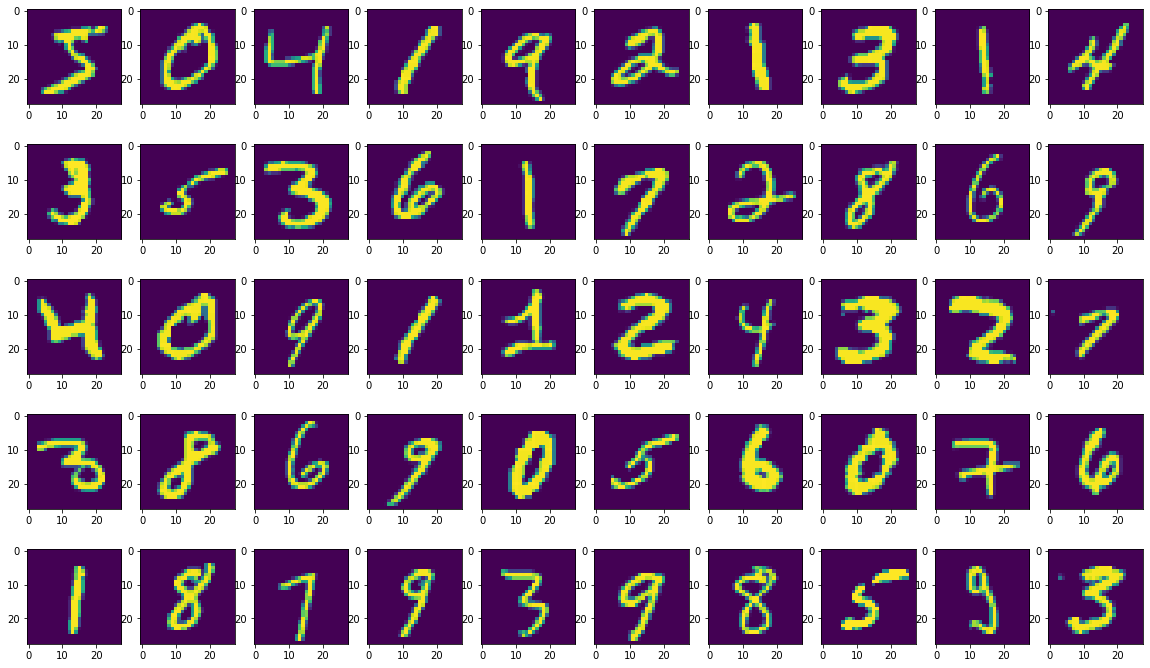

In [36]:
# Proof that we have 60k samples of 28x28 pixels, and show the first few samples
print(X_train.shape)
plt.figure(figsize=(20,12))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train[i])
plt.show()

In [37]:
# Convert the input to something that works with the Tensorflow backend
# We add a field at the end indicating that there is only 1 channel (i.e. Grayscale)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Convert from uint8 to float
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# Normalize (original is 0-255, new is 0-1)
X_train /= 255
X_test /= 255

# Reformat outcomes from labels from 1 col with numbers to 10 columns with 1|0 (categorical)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Let's train a model to recognize numbers

## Define model

In [38]:
# Define the layers of the model
model2 = Sequential()

# Convolutional part
model2.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

# Fully connected part
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))

# Compile
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [39]:
# Train
# early_stop_monitor = keras.callbacks.EarlyStopping(patience=1, monitor='val_loss')
# model2.fit(X_train, Y_train, epochs=5, batch_size=512, callbacks=[early_stop_monitor], validation_data=(X_test, Y_test))
model2.fit(X_train, Y_train, epochs=2, batch_size=128, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 28s 466us/step - loss: 0.3170 - acc: 0.9317 - val_loss: 0.0896 - val_acc: 0.9799
Epoch 2/2
60000/60000 [==============================] - 27s 444us/step - loss: 0.1013 - acc: 0.9757 - val_loss: 0.0649 - val_acc: 0.9838


In [8]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(score[0],5))
print('Test accuracy:', str(round(score[1],4)*100)+"%")

Test loss: 0.063
Test accuracy: 98.54%


In [10]:
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               495744    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

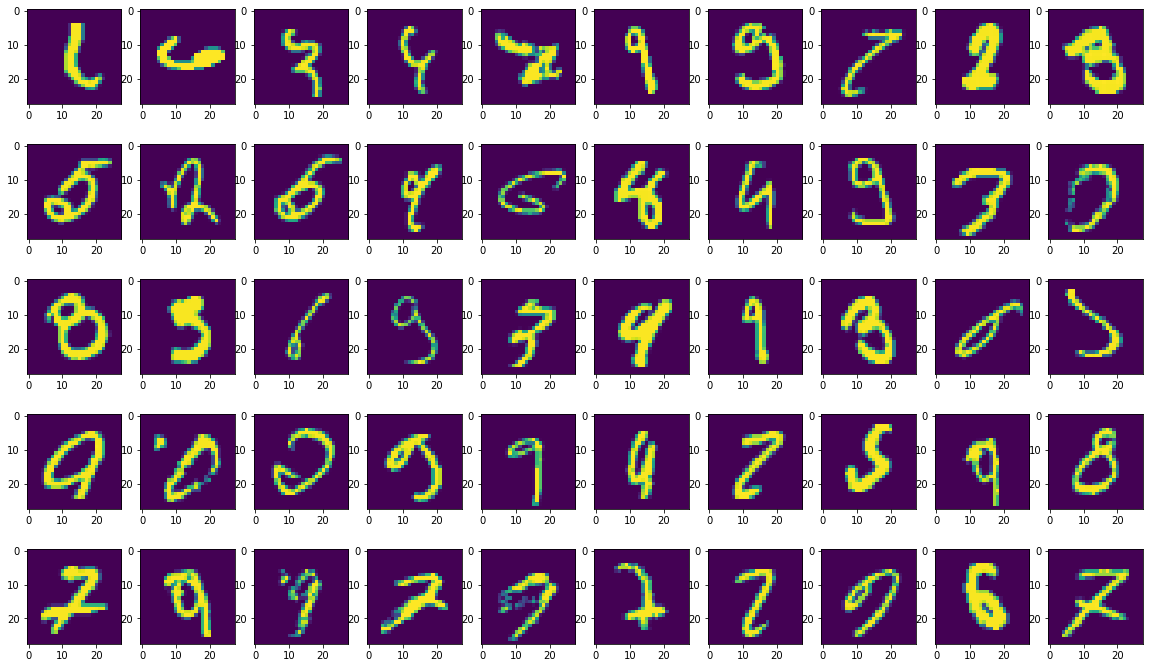

In [40]:
# Let's show a few misclassified pictures
Y_pred = model2.predict(X_test)
delta = np.abs(Y_test - Y_pred)
indexes = np.sum(delta, axis=1).argsort()[-50:][::-1]

plt.figure(figsize=(20,12))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_viz[indexes[i]])
plt.show()


In [33]:
for i in range(50):
    print(i, Y_test[indexes[i]].argmax(), np.around(Y_pred[indexes[i]], decimals=0).argmax())

0 6 4
1 6 1
2 5 6
3 8 0
4 8 7
5 9 0
6 2 7
7 9 1
8 0 7
9 9 3
10 8 2
11 5 3
12 9 1
13 5 0
14 9 0
15 8 9
16 8 3
17 8 0
18 5 3
19 8 7
20 8 4
21 5 6
22 9 5
23 7 2
24 9 1
25 9 7
26 3 7
27 2 1
28 9 4
29 8 0
30 0 0
31 6 5
32 8 7
33 9 4
34 9 1
35 2 0
36 9 1
37 7 2
38 8 0
39 8 0
40 9 5
41 8 9
42 9 1
43 8 9
44 8 2
45 7 0
46 6 1
47 0 6
48 3 8
49 8 1
